In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
house=pd.read_csv("house_data.csv")

In [3]:
house.head()

,price,surface,arrondissement
0,1820,46.1,1.0
1,1750,41.0,1.0
2,1900,55.0,1.0
3,1950,46.0,1.0
4,1950,49.0,1.0


In [4]:
#Verifions si le dataset contient des valeurs manquantes
house[house['arrondissement'].isna()==True].head()

,price,surface,arrondissement
149,3000,NaN,NaN
339,980,NaN,NaN
509,1590,NaN,NaN
674,1580,NaN,NaN
742,450,NaN,NaN


In [5]:
#Pour faciliter la tache, je vais supprimer toutes les lignes contenant des valeurs manquantes
housena=house.dropna(axis=0)

In [6]:
#Vérification avec price, surface et arrondissement
housena[housena['price'].isna()==True].head()

,price,surface,arrondissement


In [7]:
X = np.matrix([np.ones(housena.shape[0]), housena['surface'].as_matrix(), housena['arrondissement'].as_matrix()]).T
Y = np.matrix(housena['price']).T

/home/gabin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [8]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, train_size=0.8)

In [9]:
regr = linear_model.LinearRegression()

In [10]:
regr.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
error=1-regr.score(xtest,ytest)
print(error)

0.2913388988091039


Je vais supposer que la variable arrondissement n'a aucun effet sur les prix du loyer

In [12]:
housesa=house[['price','surface']]
housesa=housesa.dropna(axis=0)

In [13]:
X = np.matrix([np.ones(housesa.shape[0]), housesa['surface'].as_matrix()]).T
Y = np.matrix(housena['price']).T
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, train_size=0.8)

/home/gabin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [14]:
regr.fit(xtrain, ytrain)
error=1-regr.score(xtest,ytest)
print(error)

0.1678385340617795


In [15]:
#Là déja, on remarquait que la variable arrondissement pourrait avoir un effet sur le prix du loyer.
#Vu que l'erreur a augmenté de 7%

In [16]:
#Faire pareil avec la surface, n'aurait aucun sens

Je vais procéder à la supression des valeurs abbérantes voir qu'est que cela va donné

In [17]:
#Là je recupère les differentes valeurs d'arrondissement
house['arrondissement'].drop_duplicates()

0       1.0
149     NaN
165     2.0
295     3.0
471     4.0
651    10.0
Name: arrondissement, dtype: float64

Je vais afficher successivement les prix du loyen en fonction de la surface pour chaque arrondissement et supprimer les valeurs abbérantes

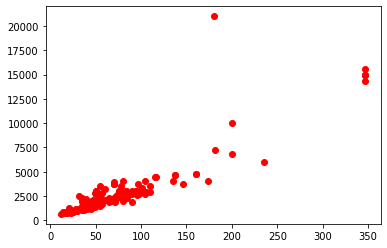

In [18]:
plt.plot(housena[housena['arrondissement']==1.0]['surface'],housena[housena['arrondissement']==1.0]['price'],"ro")

In [19]:
house1=housena[housena[housena['arrondissement']==1.0]<=15000]
house1=house1.dropna(axis=0)
house1.head()

,price,surface,arrondissement
0,1820.0,46.1,1.0
1,1750.0,41.0,1.0
2,1900.0,55.0,1.0
3,1950.0,46.0,1.0
4,1950.0,49.0,1.0


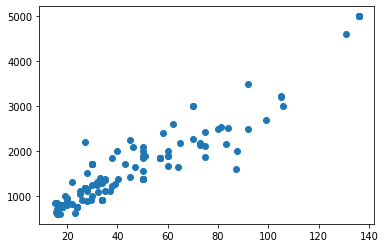

In [20]:
plt.plot(housena[housena['arrondissement']==2.0]['surface'],housena[housena['arrondissement']==2.0]['price'],"o")

In [21]:
house2=housena[housena['arrondissement']==2.0]
house2=house2.dropna(axis=0)
house2.head()

,price,surface,arrondissement
165,1850,38.0,2.0
166,1885,51.0,2.0
167,2000,40.0,2.0
168,2100,46.0,2.0
169,2107,75.0,2.0


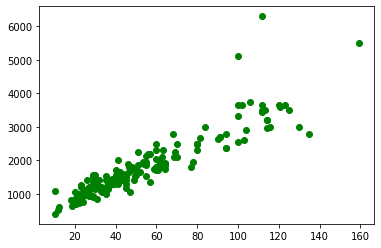

In [22]:
plt.plot(housena[housena['arrondissement']==3.0]['surface'],housena[housena['arrondissement']==3.0]['price'],"go")

In [23]:
house3=housena[housena[housena['arrondissement']==3.0]<=4000]
house3=house3.dropna(axis=0)
house3.head()

,price,surface,arrondissement
295,1308.0,45.0,3.0
296,1400.0,29.0,3.0
297,1450.0,38.0,3.0
298,1490.0,40.0,3.0
299,1540.0,35.0,3.0


/home/gabin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


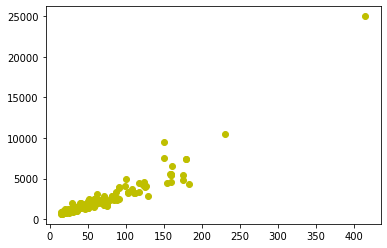

In [24]:
plt.plot(housena[house['arrondissement']==4.0]['surface'],housena[house['arrondissement']==4.0]['price'],"yo")

In [25]:
house4=housena[housena[housena['arrondissement']==4.0]<=15000]
house4=house4.dropna(axis=0)
house4.head()

,price,surface,arrondissement
471,1800.0,50.0,4.0
472,1800.0,42.0,4.0
473,1800.0,72.0,4.0
474,1850.0,53.0,4.0
475,1875.0,53.0,4.0


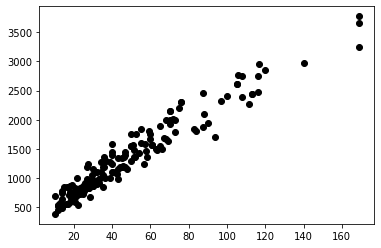

In [26]:
plt.plot(house[house['arrondissement']==10.0]['surface'],house[house['arrondissement']==10.0]['price'],"ko")

In [27]:
house10=housena[housena[housena['arrondissement']==10.0]<=4000]
house10=house10.dropna(axis=0)
house10.head()

,price,surface,arrondissement
651,1300.0,37.00,10.0
652,1400.0,47.00,10.0
653,1578.0,56.98,10.0
654,1590.0,40.00,10.0
655,1750.0,52.57,10.0


In [28]:
houseNonAb=pd.concat([house1,house2,house3,house4,house10])
houseNonAb.head()

,price,surface,arrondissement
0,1820.0,46.1,1.0
1,1750.0,41.0,1.0
2,1900.0,55.0,1.0
3,1950.0,46.0,1.0
4,1950.0,49.0,1.0


In [29]:
X = np.matrix([np.ones(houseNonAb.shape[0]), houseNonAb['surface'].as_matrix()]).T
Y = np.matrix(houseNonAb['price']).T
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, train_size=0.8)

/home/gabin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [30]:
regr.fit(xtrain, ytrain)
error=1-regr.score(xtest,ytest)
print(error)

0.12933076287648615


In [31]:
#C'est pas l'extrase mais j'ai réussi à le réduire de 1% :)